# Outline Python script for the Year 3 Physical Chemistry Lab Automated Data Acquisition
### Version 1.1 - Updated 10 October 2020
Nick Brooks

This notebook provides an outline for developing a program that will allow you to investigate the conductivity of simple electronic components. It communicate with an Arduino that is configured to provide as a voltage source, as well as read the potential across the test component and current flowing through it. A full description of the experiment and the way that you communicate with the Arduino is available on Blackboard. 
Before you begin, you will need to install a module that lets Python communicate through a serial connection with other pieces of equipment. You only need to do this once to get everything set up.

Before you start, you need to install a Python module that allows you to work with serial connections to your computer, you only need to do this once and it will stay installed in your Python distribution.

Run the cell below and wait for the module to download and install.

In [1]:
conda install pyserial

Solving environment: ...working... done

## Package Plan ##
Note: you may need to restart the kernel to use updated packages.

  environment location: C:\Users\franc\anaconda3

  added / updated specs:
    - pyserial


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38haa95532_0         2.9 MB
    pyserial-3.5               |   py38haa95532_0         163 KB

    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be INSTALLED:

  pyserial           pkgs/main/win-64::pyserial-3.5-py38haa95532_0

The following packages will be UPDATED:

  conda                                        4.8.3-py38_0 --> 4.10.3-py38haa95532_0




conda-4.10.3         | 2.9 MB    |            |   0% 
conda-4.10.3         | 2.9 MB    | 7          |   8% 
conda-4.10.3         

If you receive a 'syntax error' when running to command above, please run the same command in a terminal window. If you are using Windows, you can launch a terminal window by typing CMD into the main Windows search bar (this is usually towards the left of the main toolbar at the bottom of your screen) and running the CMD program. If you are using MacOS or Linux, you can open the 'Terminal' program from your application launcher.

Next you need to point the program that you'll be writing towards the libraries that it will need to run. The libraries that you need are the 'serial' library that contains the commands for serial communicaiton, some parts of serial tools so you can find the name of the port that your instrument is connected to, 'time' for allowing your program to wiat and the standard tools that you have used in the past for data manipulation, curve plotting and fitting.<br>
Run the cell below to import the appropriate libraries.

In [1]:
import serial
import serial.tools.list_ports
import time
%pylab inline
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


So that you can tell your program where to send and receive information, you need to find the name of the port that you have connected your instrument to. The port is a virtual serial port that runs over the USB connection (effectively the serial commands are send over USB and then decoded in the instrument).<br>
Start by making sure that your Arduino is <b>disconnected</b> from your computer, run the cell below and make a note of the port names that show up (there may be no ports shown at this point). Next <b>connect</b> your instrument to a USB port on your computer, wait for a moment to check that any required drivers are installed (on Windows you may see a message saying that your device is being prepared and then one to say that it is ready for use), and then run the cell below again to get an updated list of the available serial ports. The name of the extra port that shows up with your Arduino connected is the one that you should use in the subsequent code.
Note that the port naming scheme is different depending on your opperating systems:<br>
<b>Windows.</b> If you are using Windows, your Arduino will show up on a port named 'COM' and then a number (e.g. COM7).<br>
<b>MacOS or Linux.</b> If you are using MacOS or Linux, your Arduino port will be named similar to '/dev/cu.usbmodem' and then a number.

In [36]:
ports = serial.tools.list_ports.comports()
for p in ports:
    print(p.device)
print (len(ports), 'ports found')

COM1
COM4
2 ports found


To open the serial connection between your computer and Arduino, you need to specify the parameters that the Arduino uses to communicate. You will need to specify the port name, a baud rate (the number of bits per second) of 9600, and a timeout time of 2 seconds.<br>
You can use the following code outline to open a serial conection that we're going to name 'ser':<br>
```python
ser = serial.Serial('port name', baudrate=x, timeout=x)```

For example (note that you will need to change the port name to match the one found above):

```python
ser = serial.Serial('/dev/cu.usbmodem144301', baudrate=9600, timeout=2)```

In [5]:
class serial_intf():
    def __init__(self, **kwargs) -> None:
        
        


ser =serial.Serial("COM4", baudrate = 9600, timeout = 5)


When the serial connection is opened, the Arduino will reset and it will send three lines of information back to the computer. You can read each line into a variable called ```b``` using the code:
```python
b = ser.readline()```

The text is read in as a list of 8-bit characters which you can print out directly, but it may be useful to convert it to a string. You can use the following code to covert the chracter list to a string named ```readstring```:

```python
readstring = b.decode("utf-8")```

Finally, you can print each line as it is read using:

```python
print(readstring)```

You may find it useful to run these commands in a ```for``` loop that repeats 3 times rather than just repeating then 3 times explicitly.

In [11]:
for i in range(3):
    b = ser.readline()
    readstring = b.decode("utf-8")
    print(readstring)

Imperial College London - Department of Chemistry

Year 3 Physical Chemistry Lab

Version NB1.0 - 8-9-20



Next, you should try to send some commands to the Arduino and then read back the response.<br>
You can send a command using the code: ```ser.write(bytestowrite)```, but remember from above that the information is sent and received as a list of 8-bit characters which is subtally different from a python string. To get a command ready to send, you need to define a string to send, for example using:
```python
writestring = '<S0>'```
Then this string needs to be encoded as a list of 8-bit ASCII characters using:
```python
bytestowrite = writestring.encode()```
After the command has been sent, the Arduino will receive it, process is and respond with one line which you should read as you did in the cell above (but remember there will only be one line now rather than three).

In [16]:
test_string = "<S0>" 
thingtowrite = test_string.encode()
ser.write(thingtowrite)
c = ser.readline().decode("utf-8")
print(c)

S 0.000



Now try to set up a loop that sets the applied voltage in small steps between 0 and 5 volts and at each step reads the current running through the LED, and the voltage across it. You will need to store each reading in a list so you can plot them later. You should think about if it is appropriate to insert short delays in the program (for instance to allow the set voltage to stabilise before reading your data), you can do this using the command:
```python
time.sleep(0.1)```
Where the number in brackets is the number of seconds to wait (100 ms in the example above).

In [58]:
def timetest():
    """Function used for optimising time to wait for each measurement simply by fixing the input voltage and varying the time
    waited for each measurement.
    """
    ser.write("<S3.00>".encode())
    ser.readline()
    with open("timetest", "w") as output:
        output.write("time voltage current\n")
        for i in list(linspace(1,0,51)/10):
            ser.write("<V2>".encode())
            ser.write("<I1>".encode())
            V = ser.readline().decode("utf-8").split()[1]
            I = ser.readline().decode("utf-8").split()[1]
            #print(I)
            output.write(str(i) + " "+str(V) +" " +str(I)+"\n" )
            time.sleep(i)

class dummyserial:
    def __init__(self) -> None:
        self.a  = 0
    def readline(self):
        return "S 1.00".encode()
    def write(self, b):
        self.a = b.decode("utf-8")


import datetime
def collect(colour, ser):
    list_y=[]
    list_x=[]
    with open(str(colour)+".txt", "w") as text_file:
        
        text_file.write("V_range: 0-5V, V_Step: 0.05V, Delay: 50 ms\n"+str(datetime.datetime.now())[:10]+ "\n"+'voltage'+' '+'current'+'\n')
        for i in list(linspace(0,5,101)):
            writestring = '{0}{1}{2}'.format("<S",str(i),">")
            print(writestring)
            bytestowrite = writestring.encode()
            ser.write(bytestowrite)
            ser.write('<I1>'.encode())
            ser.write("<V2>".encode())
            z = ser.readline().decode("utf-8").split()[1]
            y = ser.readline().decode("utf-8").split()[1]
            x = ser.readline().decode("utf-8").split()[1]
            text_file.write(x+' '+y+'\n')
            time.sleep(0.05)
            
def repeat(repeats, colour):  
    for j in [colour + str(i) for i in range(repeats)]:
        collect(j)

        
#repeat(10, "yellow")
collect('red2', dummyserial())
#timetest()

<S0.0>
<S0.05>
<S0.1>
<S0.15000000000000002>
<S0.2>
<S0.25>
<S0.30000000000000004>
<S0.35000000000000003>
<S0.4>
<S0.45>
<S0.5>
<S0.55>
<S0.6000000000000001>
<S0.65>
<S0.7000000000000001>
<S0.75>
<S0.8>
<S0.8500000000000001>
<S0.9>
<S0.9500000000000001>
<S1.0>
<S1.05>
<S1.1>
<S1.1500000000000001>
<S1.2000000000000002>
<S1.25>
<S1.3>
<S1.35>
<S1.4000000000000001>
<S1.4500000000000002>
<S1.5>
<S1.55>
<S1.6>
<S1.6500000000000001>
<S1.7000000000000002>
<S1.75>
<S1.8>
<S1.85>
<S1.9000000000000001>
<S1.9500000000000002>
<S2.0>
<S2.0500000000000003>
<S2.1>
<S2.15>
<S2.2>
<S2.25>
<S2.3000000000000003>
<S2.35>
<S2.4000000000000004>
<S2.45>
<S2.5>
<S2.5500000000000003>
<S2.6>
<S2.6500000000000004>
<S2.7>
<S2.75>
<S2.8000000000000003>
<S2.85>
<S2.9000000000000004>
<S2.95>
<S3.0>
<S3.0500000000000003>
<S3.1>
<S3.1500000000000004>
<S3.2>
<S3.25>
<S3.3000000000000003>
<S3.35>
<S3.4000000000000004>
<S3.45>
<S3.5>
<S3.5500000000000003>
<S3.6>
<S3.6500000000000004>
<S3.7>
<S3.75>
<S3.8000000000000003>


dict_keys(['avg_voltages', 'std_voltages', 'avg_current', 'std_current'])


['red0.txt',
 'red1.txt',
 'red2.txt',
 'red3.txt',
 'red4.txt',
 'red5.txt',
 'red6.txt',
 'red7.txt',
 'red8.txt',
 'red9.txt',
 'REDaverages']

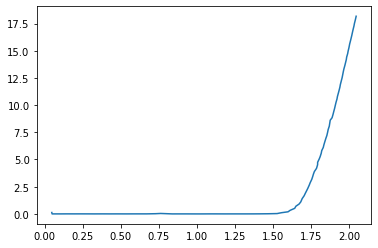

In [63]:



def plotting(txt):
    x,y=[],[]
    with open(txt) as file:
        for i in file.readlines()[3:]:
            value_y=i.split()
            x.append(float(value_y[0]))
            y.append(float(value_y[1]))
        plot(x,y,linestyle=' ',marker='x')
        show()
#plotting('red.txt')

import os
def analysis(colour):
    with open(str(colour.upper()) + "averages", "w") as output:
        output.write("avg_voltages"+" "+"std_voltages"+" "+"avg_current"+" "+"std_current\n")
        files = []
        for i in os.listdir():
            if colour in i:
                file_ = open(i)
                files.append(file_.readlines()[3:])
                file_.close()
        for i in range(len(files[0])):
            currents = []
            voltages = []
            for j in range(len(files)):
                #print(files[j][i].split()[1])
                currents.append(float(files[j][i].split()[1]))
                voltages.append(float(files[j][i].split()[0]))
            output.write(str(average(voltages))+" "+str(std(voltages))+" "+str(average(currents)) + " " + str(std(currents))+ "\n")

def getdat(filename):
    with open(filename) as file:
        columns = {}
        file = file.readlines()
        for line in range(len(file)):
            if file[line].split()[0] == "Date":
                file = file[line+1:]
                break
        headers = file[0].split()
        
        for i in headers:
            columns[i] = []
        for i in file[1:]:
            b = i.split()
            for j in range(len(headers)):
                columns[headers[j]].append(float(b[j])) 
        return columns
#reddata = getdat("YELLOWaverages")
def complete_lab(colour):
    repeat(10, colour)
    datafix(colour)
    data = getdat(colour.upper() + "averages")
    errorbar(data["avg_voltages"], data["avg_current"], yerr = array(data["std_current"])*10, xerr = array(data["std_voltages"])*10, linewidth = 0.5)
    
test_idk = getdat("red\\REDaverages")
print(test_idk.keys())
plot(test_idk["avg_voltages"], test_idk["avg_current"])
os.listdir("red")

Plot out your data and think about how you could extend the experiment, for example, can you measure multiple LEDs and compare their response, how does the response of an LED compare to a standard resistor?

['avg_voltages', 'std_voltages', 'avg_current', 'std_current']


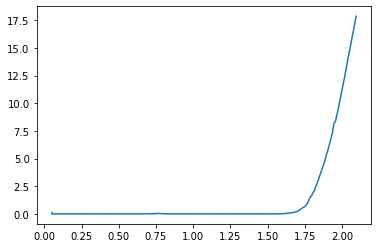

In [8]:
yellow_ = getdat("YELLOWaverages")
print(list(yellow_.keys()))
plot(yellow_["avg_voltages"], yellow_["avg_current"])

When you are finished, you should close the serial connection. Only one program at a time can send information to a particular serial port, so by closing the connection, you free it up so that other programs could communicate with your instrument. Make sure you open the connection again when you want to start working again.<br>
You can close the connection using the following command:
```python
ser.close()```


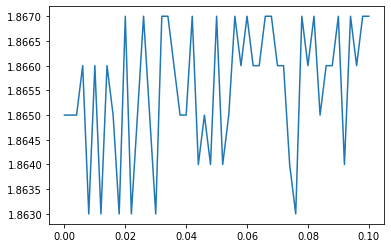

In [32]:
timedat = getdat("timetest")
plot(timedat["time"], timedat["voltage"])


In [21]:
ser.write("<V2>".encode())
print(ser.readline().decode("utf-8").split()[1])

2.999


In [60]:
import timeit
def timetest2():
    with open("timetest2", "w") as output:
        output.write("time voltage\n")
        ser.write("<S0.00>".encode())
        ser.readline()
        start = timeit.default_timer()
        ser.write("<S5.00>".encode())
        ser.readline()
        t = 0
        while t < 0.1:
            ser.write("<V2>".encode())
            output.write(str(timeit.default_timer()-start)+" "+ser.readline().decode("utf-8").split()[1]+ "\n")
            t += 0.001
            

timetest2()        

In [45]:
getdat(timetest2())


TypeError: expected str, bytes or os.PathLike object, not NoneType

In [83]:
print(str(datetime.datetime.now())[:10])

2021-12-08


In [50]:
ser =serial.Serial("COM4", baudrate = 345600, timeout = 5)



In [52]:
for i in ["a", "b", "c"]:
    ser.write(i.encode())
    
    print(ser.readline().decode("utf-8"))

I received: a

I received: b

I received: c



In [53]:
ser.close()

In [81]:
class kms:
    def __init__(self):
        self.x = 3
    def test(self, why):
        self.x = why

hle = kms()
hle.test(5)
hle.x
hle.y = 4
hle.y

TypeError: test() missing 1 required positional argument: 'why'

In [22]:
def headers():
    heading = "V_range: 0-5V, V_Step: 0.05V, Delay: 50 ms\n"+"Date : 2021-12-07"+ "\n"
    for i in ["blue", "green", "red", "resistor", "yellow"]:
        for j in os.listdir(i):
            if i in j:
                with open(i+"\\"+j) as fin:
                    keep = fin.read()
                with open(i+"\\"+j, "w") as fout:
                    fout.write(heading + keep)
headers()

In [23]:
with open("test_file.txt") as file:
    keep = file.read()
with open("test_file.txt", "w") as file:
    file.write("Headers\n" + keep)



In [15]:
with open("test_template", "w") as file:
    file.write("Headers")

In [36]:
def whatever(ex = "a"):
    print(ex)
whatever()

a


In [20]:
with open("red0.txt") as fin:
    lines = fin.readlines()[2:]
print(lines)


['0.047 -0.003\n', '0.105 0.000\n', '0.143 -0.003\n', '0.194 0.001\n', '0.238 0.003\n', '0.293 -0.001\n', '0.329 0.002\n', '0.384 0.002\n', '0.423 -0.011\n', '0.470 -0.003\n', '0.538 0.003\n', '0.584 0.011\n', '0.627 -0.006\n', '0.668 -0.002\n', '0.730 0.028\n', '0.760 0.037\n', '0.844 0.002\n', '0.885 -0.012\n', '0.948 -0.008\n', '0.982 -0.007\n', '1.014 -0.011\n', '1.103 0.007\n', '1.124 0.001\n', '1.198 -0.005\n', '1.227 0.006\n', '1.276 0.000\n', '1.327 -0.003\n', '1.385 -0.004\n', '1.420 0.002\n', '1.459 0.004\n', '1.525 0.023\n', '1.558 0.085\n', '1.597 0.185\n', '1.598 0.309\n', '1.624 0.509\n', '1.662 0.699\n', '1.671 0.922\n', '1.677 1.079\n', '1.688 1.394\n', '1.700 1.622\n', '1.710 1.896\n', '1.733 2.156\n', '1.719 2.341\n', '1.750 2.636\n', '1.742 2.798\n', '1.749 3.148\n', '1.759 3.378\n', '1.767 3.688\n', '1.783 3.910\n', '1.783 4.135\n', '1.797 4.525\n', '1.791 4.757\n', '1.803 5.063\n', '1.809 5.279\n', '1.818 5.543\n', '1.824 5.781\n', '1.831 6.087\n', '1.833 6.297\n',

In [23]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [80]:
os.listdir("red")

['red0.txt',
 'red1.txt',
 'red2.txt',
 'red3.txt',
 'red4.txt',
 'red5.txt',
 'red6.txt',
 'red7.txt',
 'red8.txt',
 'red9.txt',
 'REDaverages']

In [78]:
print(5/10)

0.5


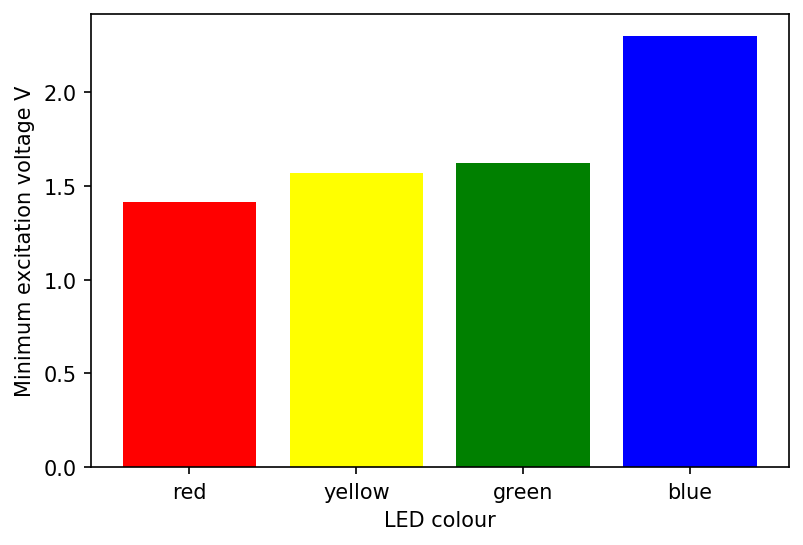

In [7]:
bar([1,2,3,4], [1.412, 1.567, 1.622, 2.302], tick_label = ["red", "yellow", "green", "blue"], color = ["red", "yellow", "green", "blue"])
ylabel("Minimum excitation voltage V")
xlabel("LED colour")
rcParams['figure.figsize'] = (6, 4)
rcParams['figure.dpi'] = 150